In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras

In [67]:
fashion_mnist = keras.datasets.fashion_mnist

In [65]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [41]:
train_images.shape

(60000, 28, 28)

In [44]:
np.set_printoptions(linewidth=200)
train_images[0]        #displaying pixels

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,   1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,   0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,   0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,  10,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 155, 236, 207, 178, 107, 156

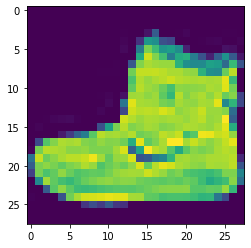

In [45]:
plt.imshow(train_images[0]) 

In [46]:
train_labels[0]

9

In [47]:
train_labels[567]

4

In [48]:
test_images.shape

(10000, 28, 28)

In [49]:
train_labels = tf.keras.utils.to_categorical(train_labels, num_classes=10)
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes=10)

In [50]:
train_labels[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [51]:
tf.keras.backend.clear_session()  #remove the default graph, if any

#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
# Use reshape() or you can use flatten() also. 
# This is because, NN cannot handle 2-D data. It always needs a 1D vector.

model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
# BatchNormalization takes a batch of data and performs z-score normalization by taking mean and std of that batch of data
model.add(tf.keras.layers.BatchNormalization())

# Alternatively, the following code does min-max normalization
#trainX, testX= trainX/255.0, testX/255.0

#Add 1st hidden layer
model.add(tf.keras.layers.Dense(200, activation='sigmoid'))
#Add 2nd hidden layer
model.add(tf.keras.layers.Dense(100, activation='sigmoid'))
#Add 3rd hidden layer
model.add(tf.keras.layers.Dense(60, activation='sigmoid'))
#Add 4th hidden layer
model.add(tf.keras.layers.Dense(30, activation='sigmoid'))
#Add OUTPUT layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [52]:
#Create optimizer with non-default learning rate
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.03)

#Compile the model
model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

#model.compile(optimizer='adom', loss='categorical_crossentropy', metrics=['accuracy'])

In [53]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense (Dense)                (None, 200)               157000    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_2 (Dense)              (None, 60)                6060      
_________________________________________________________________
dense_3 (Dense)              (None, 30)                1830      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                3

In [54]:
model.fit(train_images,train_labels,          
          validation_data=(test_images,test_labels),
          epochs=30,
          batch_size=32)

Epoch 1/30
1875/1875 [==============================] - 2s 1ms/step - loss: 2.2571 - accuracy: 0.1969 - val_loss: 2.0432 - val_accuracy: 0.3600
Epoch 2/30
1875/1875 [==============================] - 2s 1ms/step - loss: 1.5019 - accuracy: 0.4625 - val_loss: 1.1737 - val_accuracy: 0.5711
Epoch 3/30
1875/1875 [==============================] - 2s 1ms/step - loss: 1.0645 - accuracy: 0.5954 - val_loss: 0.9305 - val_accuracy: 0.6373
Epoch 4/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.8786 - accuracy: 0.6869 - val_loss: 0.7790 - val_accuracy: 0.7185
Epoch 5/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.7609 - accuracy: 0.7359 - val_loss: 0.6902 - val_accuracy: 0.7659
Epoch 6/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6858 - accuracy: 0.7588 - val_loss: 0.6259 - val_accuracy: 0.7799
Epoch 7/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6242 - accuracy: 0.7780 - val_loss: 0.5821 - val_accuracy:

In [55]:
preds = model.predict(test_images)
preds

array([[3.5726382e-09, 3.6047990e-07, 5.3560836e-08, ..., 6.3956589e-02, 8.8289892e-04, 9.2982531e-01],
       [6.4050095e-05, 2.8526072e-08, 9.8783386e-01, ..., 8.7442033e-11, 1.9333072e-05, 2.8925209e-08],
       [4.8919948e-04, 9.9867201e-01, 2.9645848e-08, ..., 1.0306002e-04, 1.6892725e-08, 2.0246183e-09],
       ...,
       [7.3280357e-06, 8.1210786e-08, 2.7165550e-04, ..., 8.1631651e-06, 9.9449146e-01, 4.4068127e-04],
       [1.5232153e-04, 9.9850154e-01, 8.7679854e-09, ..., 2.9039613e-04, 1.0679143e-08, 7.2510526e-09],
       [4.4752110e-06, 1.0001987e-03, 5.4010002e-07, ..., 4.2569578e-02, 2.2085091e-04, 1.4270844e-03]], dtype=float32)

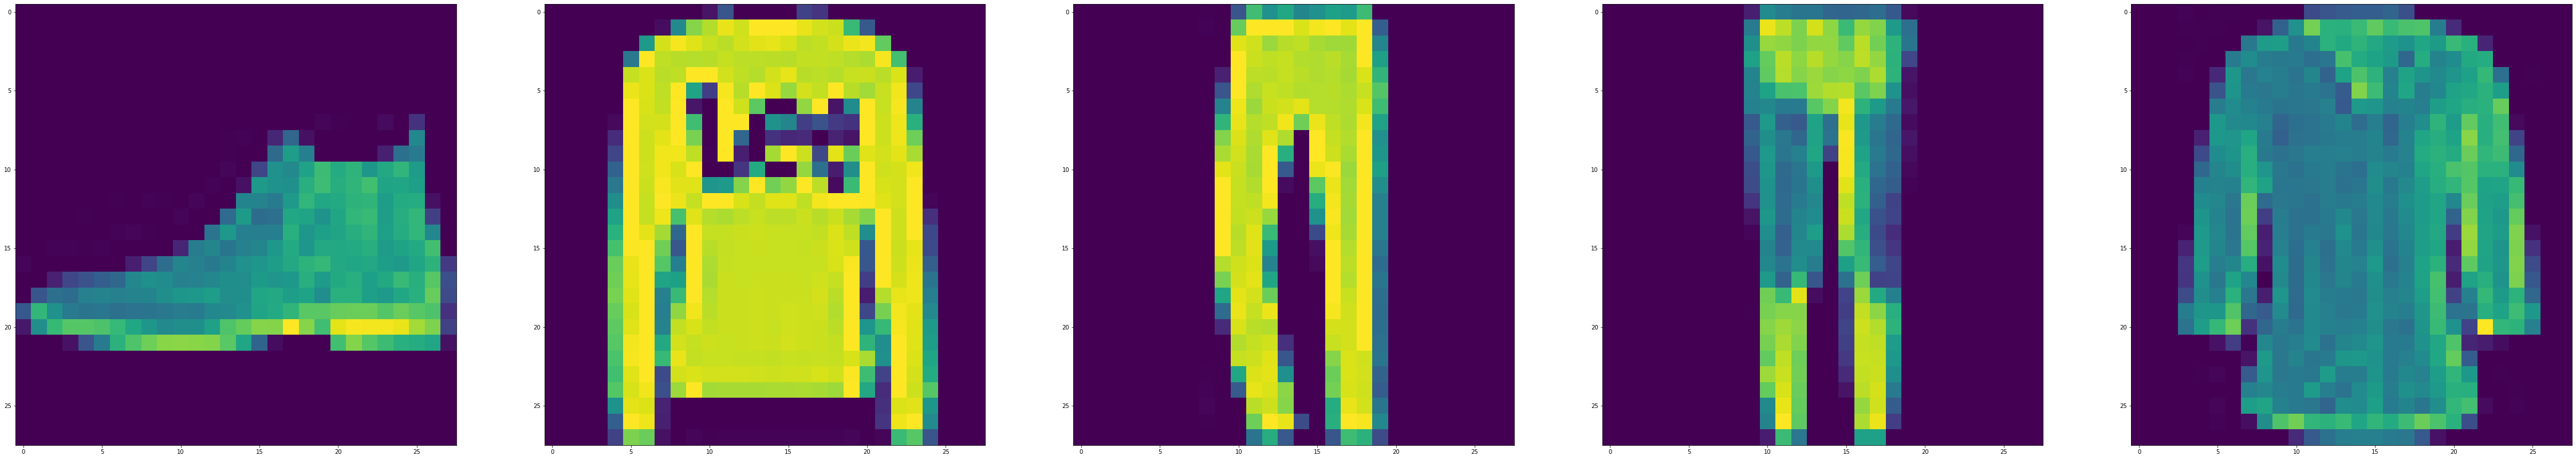

In [56]:
from PIL import Image 
f, ax = plt.subplots(1,5)
f.set_size_inches(80, 40)
for i in range(5):
    ax[i].imshow(test_images[i].reshape(28, 28))
plt.show()

In [72]:
print('Number of axes in train images: ', train_images.ndim)
print('Number of axes in test images: ', test_images.ndim)
print('Shape of train images: ', train_images.shape)
print('Shape of test images: ', test_images.shape)

Number of axes in train images:  3
Number of axes in test images:  3
Shape of train images:  (60000, 28, 28)
Shape of test images:  (10000, 28, 28)


In [73]:
train_images=train_images.reshape((60000,28,28,1))
test_images=test_images.reshape((10000,28,28,1))

In [74]:
print("After reshaping:")
print('Number of axes in train images: ', train_images.ndim)
print('Number of axes in test images: ', test_images.ndim)
print('Shape of train images: ', train_images.shape)
print('Shape of test images: ', test_images.shape)

After reshaping:
Number of axes in train images:  4
Number of axes in test images:  4
Shape of train images:  (60000, 28, 28, 1)
Shape of test images:  (10000, 28, 28, 1)


In [75]:
# normalize pixels to be between 0 and 1
train_images, test_images= train_images/255.0, test_images/255.0

In [76]:
model=keras.models.Sequential()

In [77]:
# First layer has 32 filters, each filter has (3,3) size. And stride is 1. We are not using  padding any convolution layer.
model.add(keras.layers.Conv2D(32,(3,3), activation='relu',input_shape=(28,28,1)))

In [78]:
model.add(keras.layers.MaxPooling2D((2,2)))

In [79]:
# second layer has 64 filters
model.add(keras.layers.Conv2D(64,(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))

In [80]:
# third layer has 64 filters
model.add(keras.layers.Conv2D(64,(3,3), activation='relu'))

In [81]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [82]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [83]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)               

In [84]:
model.compile(optimizer='adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

In [85]:
model.fit(train_images, train_labels,  validation_split = 0.2,epochs=2)

Epoch 1/2
1500/1500 [==============================] - 15s 10ms/step - loss: 0.5311 - accuracy: 0.8083 - val_loss: 0.3735 - val_accuracy: 0.8677
Epoch 2/2
1500/1500 [==============================] - 17s 12ms/step - loss: 0.3451 - accuracy: 0.8741 - val_loss: 0.3259 - val_accuracy: 0.8820


In [86]:
test_loss, test_acc = model.evaluate(test_images,test_labels)
print(test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.3339 - accuracy: 0.8757
0.8756999969482422


In [87]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

In [88]:
model_dnn = tf.keras.models.Sequential([
              tf.keras.layers.Flatten(input_shape=(28,28)),
              tf.keras.layers.Dense(64, activation='relu'),
              tf.keras.layers.Dense(10, activation='softmax')])

In [89]:
model_dnn.compile(optimizer ='adam', 
                 loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

In [90]:
model_dnn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [91]:
model_dnn.fit(train_images, train_labels,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 1s 677us/step - loss: 0.5177 - accuracy: 0.8191
Epoch 2/5
1875/1875 [==============================] - 1s 619us/step - loss: 0.3905 - accuracy: 0.8613
Epoch 3/5
1875/1875 [==============================] - 1s 625us/step - loss: 0.3560 - accuracy: 0.8719
Epoch 4/5
1875/1875 [==============================] - 1s 659us/step - loss: 0.3325 - accuracy: 0.8794
Epoch 5/5
1875/1875 [==============================] - 1s 690us/step - loss: 0.3136 - accuracy: 0.8851


In [92]:
test_loss, test_acc = model_dnn.evaluate(test_images,test_labels)
print(test_acc)

313/313 [==============================] - 0s 519us/step - loss: 0.3538 - accuracy: 0.8727
0.8726999759674072


In [17]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

313/313 - 0s - loss: 0.3572 - accuracy: 0.8749


In [18]:
predictions = model.predict(test_images)

In [19]:
predictions[0]

array([1.0289430e-08, 1.5594316e-05, 3.6833324e-06, 4.7578027e-08, 2.0781715e-04, 9.3124351e-03, 8.8761745e-08, 1.9596120e-02, 1.0666933e-03, 9.6979755e-01], dtype=float32)

In [20]:
import numpy as np
np.argmax(predictions[0])

9

In [21]:
test_labels[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

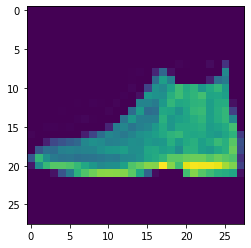

In [22]:
plt.imshow(test_images[0])